<a href="https://colab.research.google.com/gist/Larinwa/3163d9b23721b0326a1b571771815617/project_unsup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncovering Global Development Patterns: A Clustering Approach to Aid Distribution for HELP International

#### Introduction
This project focuses on clustering countries based on socio-economic and health indicators using unsupervised learning techniques, aimed at identifying countries in the most dire need of aid. The project is carried out for HELP International, a humanitarian NGO dedicated to alleviating poverty and providing relief during disasters. With a budget of $10 million, the CEO of HELP International seeks to strategically allocate resources to the countries that need aid the most.

The primary objective of this project is to use clustering algorithms to categorize countries based on key indicators that determine overall development. These indicators include:

* Child Mortality: The number of child deaths per 1,000 live births, which reflects healthcare quality and access.
* Health: A composite measure representing the health infrastructure and services available in the country.
* Income: The average income level, serving as a proxy for the overall economic status.
* GDP: The Gross Domestic Product of each country, indicating the economic output.
* Inflation: The rate of inflation, which affects the economic stability of a country.
* Life Expectancy: The average life expectancy, providing insight into the general health and quality of life.
* Other factors : Such as exports, imports, and fertility rates, which contribute to the overall development.

Using unsupervised learning methods like clustering, this project will categorize countries into groups, helping the CEO prioritize which regions should receive the most assistance. This approach provides a data-driven basis for making critical funding decisions to maximize the impact of HELP International’s efforts.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("Country-data.csv")

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

In [ ]:
#Encoding the categorical data
#Onehotencodng
tempo_df=pd.get_dummies(df['country'], dtype=float)
df.drop(columns = ['country'], inplace = True)
df = pd.concat([df, tempo_df], axis = 1)

In [ ]:
df.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Afghanistan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data = scaled_df, columns = list(df.columns))
scaled_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Afghanistan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,12.884099,...,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.077615,...,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.077615,...,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.077615,...,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.077615,...,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615,-0.077615


In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 176 entries, child_mort to Zambia
dtypes: float64(176)
memory usage: 229.8 KB


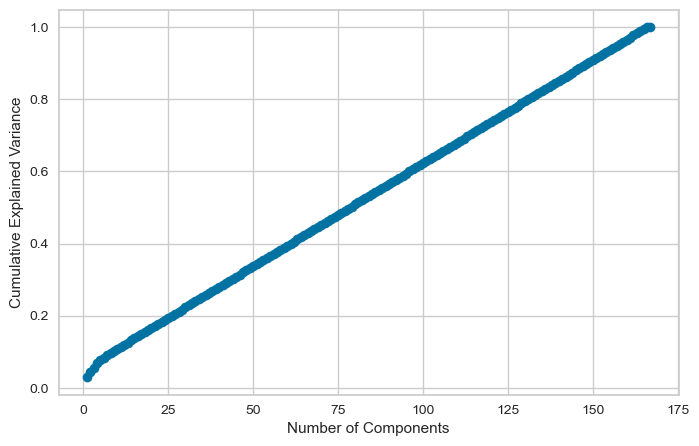

In [ ]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
threshold = 0.95  # For 95% variance
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if cumulative_variance >= threshold) + 1
print(f"Number of components for 95% variance: {n_components}")

Number of components for 95% variance: 158


In [ ]:
# Reduce the data to 158 components

columns = []
for i in range(0, 158):  # Range is fine as 0 to 158
    columns.append(f"cols{i}")

# dimentionality reduction
pca = PCA(n_components = 158, random_state = 23)
reduced_data = pca.fit_transform(scaled_df)
reduced_data = pd.DataFrame(data = reduced_data, columns = columns)

In [ ]:
reduced_data

,cols0,cols1,cols2,cols3,cols4,cols5,cols6,cols7,cols8,cols9,...,cols148,cols149,cols150,cols151,cols152,cols153,cols154,cols155,cols156,cols157
0,-3.248063,0.122848,-0.979269,1.425655,-0.251452,-0.597062,1.203160,1.461119,-0.056670,-0.000000,...,-0.000000,3.756378e-301,-1.388963e-241,3.821516e-197,2.309276e-182,1.592355e-167,-5.972442e-17,4.222596e-123,0.000000,-0.000000
1,0.479357,-0.755633,-0.454761,-1.646616,0.277448,0.198347,0.781955,-0.778097,0.694202,-0.627504,...,-0.586510,9.916752e-02,-8.573968e-01,-8.332224e-01,9.208671e-01,-1.840875e+00,-3.225160e+00,7.608958e-01,-2.507806,-0.911746
2,-0.318030,-0.584785,1.665717,-1.231162,0.248536,-0.942025,-0.273973,-0.648273,0.336604,-0.386426,...,-0.102390,-3.035477e-01,-1.571998e+00,3.408178e-01,8.341342e-02,-2.774347e+00,-1.728270e+00,8.661328e-01,0.328150,0.229621
3,-3.269692,2.178364,2.079641,1.190758,-0.433951,-1.285117,-1.384841,-1.253155,-0.365851,0.127429,...,0.172369,-5.577197e-01,6.983923e-01,-1.281285e+00,-2.050628e-02,3.986693e-01,-1.420894e+00,-1.932302e-05,0.804774,-0.098877
4,1.152452,0.175572,-0.307807,-1.201306,-0.306562,-0.485250,0.760151,-0.083362,0.377589,-0.085025,...,0.304089,-6.061860e-01,1.104181e-01,2.326475e+00,7.303242e-01,2.464598e+00,-1.219623e-01,2.677474e+00,-1.236507,0.455695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.915015,0.821687,-0.531723,-1.002095,-0.628585,0.021245,-0.310178,1.837104,-1.993906,-0.516382,...,0.472093,-6.700118e-01,-5.452787e-02,-5.621722e-02,-3.427102e-01,1.523844e+00,-4.126719e-01,6.308143e-02,-0.256635,-1.268882
163,-0.614412,-1.585235,4.229186,-0.163534,3.307864,0.228118,0.649439,-0.277403,-1.104434,0.838888,...,0.285617,-2.830356e-01,4.579749e-02,6.413061e-01,8.827704e-02,1.270569e+00,-7.046473e-01,1.536534e-01,-0.458615,0.106943
164,0.555862,1.786758,-0.325268,-1.523288,1.868026,0.121024,-0.451190,-0.765944,-0.146287,-0.850605,...,0.666699,-3.025238e-01,-3.123229e-01,-6.229192e-01,-8.130948e-01,7.735238e-01,-1.055046e+00,5.182875e-01,0.800173,-0.820218
165,-2.104534,-0.140620,1.513324,0.079784,0.982180,-1.268516,0.189290,0.315032,-0.384717,0.601152,...,1.351801,-1.139798e-01,-3.750143e-02,-3.276052e-01,2.056498e-01,2.357366e-01,-4.220493e-01,-8.857351e-02,0.095464,-0.722531


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:14

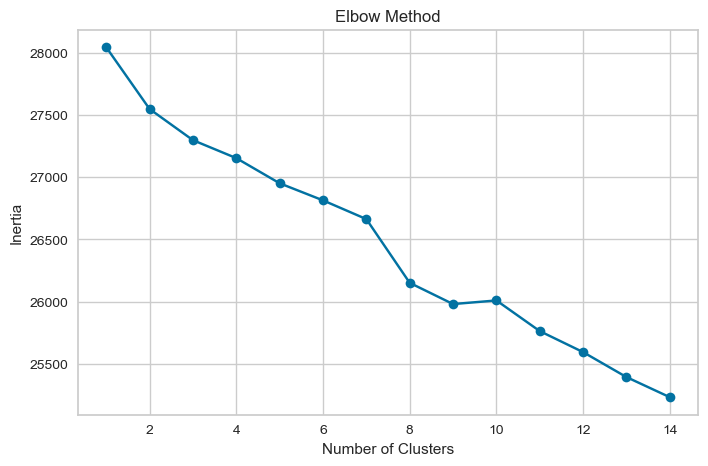

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
for n in range(1, 15):  # Test clusters from 1 to 15
    kmodel = KMeans(n_clusters=n, random_state=42)
    kmodel.fit(reduced_data)
    inertia.append(kmodel.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=7,n_init='auto',random_state=23)
kmodel.fit(reduced_data)  # Assuming you are clustering on PCA-transformed data
labels = kmodel.labels_


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
labels

array([4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [ ]:
# Add the KMeans cluster labels to your PCA-transformed data
reduced_df = pd.DataFrame(reduced_data)
reduced_df['Cluster'] = labels

In [ ]:
# Now, calculate the mean of each feature within each cluster
cluster_means = reduced_df.groupby('Cluster').mean()
print(cluster_means)

            cols0     cols1     cols2     cols3     cols4     cols5     cols6  \
Cluster                                                                         
0        1.306786 -0.329275 -0.844095 -1.495049  0.095406 -0.383580  1.130089   
1        0.010725 -1.342847 -0.372678 -0.692811  0.589754 -0.852829 -0.773103   
2        1.257052  0.631597  2.909369 -0.250302 -0.769025 -0.590478 -0.131716   
3       -1.053661  0.680660  2.528796 -0.559007  3.550080  1.100280  1.125992   
4       -3.248063  0.122848 -0.979269  1.425655 -0.251452 -0.597062  1.203160   
5        4.102741  6.122456 -1.392724 -0.710672  2.569748 -0.758614 -0.812364   
6       -0.014755 -0.036556 -0.011487  0.014175 -0.035929  0.012933 -0.010820   

            cols7     cols8     cols9  ...   cols148        cols149  \
Cluster                                ...                            
0       -0.950319  1.286047 -0.334061  ...  0.083286   8.179567e-01   
1       -0.542363  0.758566  1.449482  ... -0.106745   9.

In [ ]:
# Cluster Centers
cluster_centers = kmodel.cluster_centers_
print(cluster_centers)

[[ 1.30678609e+00 -3.29275026e-01 -8.44094924e-01 ...  7.54999181e-01
  -8.95745408e-01  2.16208939e+00]
 [ 1.07245752e-02 -1.34284715e+00 -3.72677916e-01 ...  1.20511134e+00
   7.23371318e-02  4.01958803e-01]
 [ 1.25705189e+00  6.31597178e-01  2.90936943e+00 ...  1.18709165e+00
   6.71496113e-01  1.18982212e+00]
 ...
 [-3.24806317e+00  1.22848490e-01 -9.79269324e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.10274147e+00  6.12245599e+00 -1.39272408e+00 ... -1.63614983e+00
   4.99744817e-01  7.87909829e-01]
 [-1.47551548e-02 -3.65555231e-02 -1.14869543e-02 ... -3.33508344e-03
  -4.55066618e-03 -3.22875976e-02]]


In [ ]:
preds= kmodel.predict(reduced_data)

In [ ]:

import plotly.express as px
px.scatter_3d(data_frame = df, x='gdpp', y='income',
              z='life_expec', width=600, color=preds)

In [ ]:

import plotly.express as px
px.scatter_3d(data_frame = reduced_data, x='cols0', y='cols1',
              z='cols2', width=600, color=preds)


#### Insight

The 3D scatter plot reveals insights into the clustering patterns of countries based on the reduced dimension derived from socio-economic and health-related features. The following observations are pertinent:

1. **Clustering Patterns:**
   - The presence of distinct clusters indicates that countries can be grouped into categories with similar socio-economic and health profiles. These clusters likely represent countries with comparable levels of development, healthcare infrastructure, or economic stability.
   - For instance, one cluster might correspond to developed countries with high income, low child mortality, and high life expectancy, while another cluster could represent developing countries with contrasting characteristics.

2. **Outliers:**
   - Certain points appear distant from the main clusters. These outliers could represent countries with unique socio-economic or health conditions that set them apart from typical groupings. For example, a country with a high GDP but poor healthcare outcomes might stand out.

3. **Feature Contribution:**
   - The axes of the scatter plot (or principal components) summarize the variance in the original data. Features such as GDP per capita, life expectancy, and child mortality are likely contributing significantly to the separation of clusters. The principal components help identify the most influential factors driving the clustering.

These findings support the project's objective of categorizing countries to aid strategic allocation of resources by HELP International. The distinct groupings suggest that the organization can prioritize interventions by targeting clusters of countries with similar development needs. Further investigation of outliers could also highlight unique cases that require specialized strategies.

The project on **Unsupervised Learning for Country Clustering** began with an objective to categorize countries based on socio-economic and health indicators. The primary goal was to provide HELP International with data-driven insights for prioritizing aid allocation. The dataset comprised variables such as GDP per capita, child mortality, health index, income levels, life expectancy, and inflation, among others. These indicators were chosen to reflect the economic and healthcare conditions of the countries.

The data preprocessing phase involved standardization to ensure all features contributed equally to the clustering process. Following this, dimensionality reduction using **Principal Component Analysis (PCA)** was applied to reduce the feature space while retaining 95% of the data's variance. PCA successfully reduced the dataset to 158 components, simplifying the complexity without compromising critical information.

To identify distinct groupings, the **K-Means clustering algorithm** was employed. Using the Elbow Method, the optimal number of clusters was determined to be seven. The clustering results revealed meaningful patterns, grouping countries with similar socio-economic and health profiles. Each cluster's mean was calculated to better understand the characteristics shared by the countries within.

Visualization using **3D scatter plots** provided an intuitive representation of the clusters. When plotting key features such as GDP per capita, income, and life expectancy, the clusters illustrated stark differences in development levels. This highlighted distinct groupings, such as countries with high GDP and life expectancy or nations grappling with low income and high child mortality. The PCA-transformed data further validated these groupings, showcasing clusters with well-separated boundaries. Notable outliers were also observed, warranting further investigation into unique cases.

The insights from this analysis underline the effectiveness of unsupervised learning in uncovering hidden patterns in socio-economic data. The clustering results offer HELP International a clear framework to allocate their $10 million budget. By focusing on clusters representing countries with dire needs, the NGO can maximize its impact, ensuring aid reaches the most vulnerable populations.